In [44]:
import pandas as pd
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [2]:
processed_dir='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/'
subject='225'

In [4]:
ex=mne.read_epochs(processed_dir+subject+'/cue-epo.fif')

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/225/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
600 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 36 columns
0 projection items activated


In [6]:
ex.metadata.columns

Index(['tar_color', 'dis_color', 'SOA', 'block', 'trialNum', 'trial_type',
       'corrResp', 'subResp', 'trialCorr?', 'RT', 'tar,dis stim_loc', 'ITI',
       'Tar,Dis,Other', 'trial_trigs', 'triggers', 'Unnamed: 0',
       'Eyetrack_trial', 'Timestamp_start_cue', 'Timestamp_start_mask',
       'Timestamp_start_probe', 'Timestamp_stop_cue', 'Timestamp_stop_mask',
       'Timestamp_stop_probe', 'TrialTrigs(m,c,p)', 'leftX_cue', 'leftX_mask',
       'leftX_probe', 'leftY_cue', 'leftY_mask', 'leftY_probe', 'rightX_cue',
       'rightX_mask', 'rightX_probe', 'rightY_cue', 'rightY_mask',
       'rightY_probe'],
      dtype='object')

In [23]:
ex.metadata['trial_type'][:3]

3     neut
8     neut
13     tar
Name: trial_type, dtype: object

In [25]:
ex.metadata['Tar,Dis,Other'][:3]

3     ('green_diamond', 'green_circle', 'green_circle')
8     ('green_circle', 'green_diamond', 'green_diamo...
13     ('pink_diamond', 'green_circle', 'green_circle')
Name: Tar,Dis,Other, dtype: object

In [26]:
ex.metadata['tar,dis stim_loc'][:3]

3      ('7', '6')
8      ('3', '9')
13    ('9', '12')
Name: tar,dis stim_loc, dtype: object

In [11]:
calib=pd.read_csv('/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_eyetracking/sub_225_eyetracking_calibration_block0.txt')

In [20]:
x=list(calib[' LeftScreenX'])
y=list(calib[' LeftScreenY'])

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


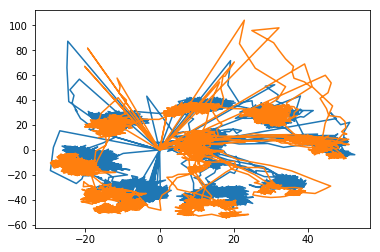

In [22]:
all_trigs=calib[np.uint8(calib[' Trigger']) != 0]
all_trigs[' Trigger']=np.uint8(all_trigs[' Trigger'])

if (167 in list(all_trigs[' Trigger'])) or (169 in list(all_trigs[' Trigger'])): 
    # these are the triggers that mark the beginning and the end of the circles being presented
    # but, not all of the older files have it
    begin_trigs=all_trigs[all_trigs[' Trigger']==167]['Timestamp'].iloc[0]
    end_trigs=all_trigs[all_trigs[' Trigger']==169]['Timestamp'].iloc[0] 
else:
    begin_trigs=all_trigs['Timestamp'].iloc[0]
    end_trigs=all_trigs[all_trigs[' Trigger']==165]['Timestamp'].iloc[-1]
    # end_trigs will be when the last circle appears, 
    # but we want to expand that past just the trigger by 4 seconds
    # Since the sampling rate of the eyetracker is 500 Hz, this means we add on approximately
    # 1,000,000 * 4 time points to get to the 'end' of the trigger
    end_trigs=end_trigs+4000000

between_trigs=calib[calib['Timestamp'] > begin_trigs][calib['Timestamp'] < end_trigs]
x=between_trigs[' LeftScreenX']
y=between_trigs[' LeftScreenY']
a=between_trigs[' RightScreenX']
b=between_trigs[' RightScreenY']
plt.plot(x,y)
plt.plot(a,b)
plt.show()

In [135]:
np.uint8(all_trigs[' Trigger'])
#trig_dict={'noon_trig':151,'one_trig':153,
    # 'three_trig':155,'five_trig':157,
    # 'six_trig':159,'seven_trig':161,
    # 'nine_trig':163,'eleven_trig':165}

array([167, 167, 167, 167, 151, 151, 151, 151, 153, 153, 153, 153, 155,
       155, 155, 155, 157, 157, 157, 157, 159, 159, 159, 159, 161, 161,
       161, 161, 163, 163, 163, 163, 165, 165, 165, 165, 169, 169, 169,
       169], dtype=uint8)

In [29]:
meta=ex.metadata
meta['leftX_cue'].iloc[0]

'[-5.0147699999999995, -3.9492199999999995, -7.02148, -4.94275, -3.3692599999999997, -4.60901, -4.31042, -3.80798, -6.34912, -3.21997, -3.8715800000000002, -3.96375, -3.62512, -5.75854, -4.66772, -3.0575, -2.6976299999999998, -1.45605, -2.6825, -2.48706, -3.30444, -3.3142099999999997, -4.32947, -2.4523900000000003, -2.70361, -1.01929, -4.20911, -3.8502199999999998, -4.6145, -1.5660399999999999, -2.77283, -3.88501, -4.7611099999999995, -1.99695, -1.43164, -3.4646, -2.63013, -3.0885, -2.60059, -4.30249, -4.4913300000000005, -1.95313]'

In [41]:
meta.head()

,tar_color,dis_color,SOA,block,trialNum,trial_type,corrResp,subResp,trialCorr?,RT,...,leftX_probe,leftY_cue,leftY_mask,leftY_probe,rightX_cue,rightX_mask,rightX_probe,rightY_cue,rightY_mask,rightY_probe
3,pink,red,short,1,0,neut,p,p,1.0,1.232364,...,"[-4.665769999999999, -3.9760699999999995, -3.2...","[18.5511, 17.1274, 15.2449, 18.2622, 17.4418, ...","[21.5856, 20.2047, 20.0901, 19.9092, 21.4169, ...","[15.6833, 15.8046, 10.7599, 13.9799, 19.6875, ...","[23.9598, 25.1962, 25.0989, 24.5359, 25.3954, ...","[20.1158, 18.9086, 19.6653, 18.9185, 21.0393, ...","[26.4229, 25.816999999999997, 24.8599, 24.8066...","[25.8068, 23.0835, 26.4502, 25.3779, 22.8762, ...","[20.4567, 22.3108, 21.2616, 21.4546, 20.7847, ...","[20.9633, 21.558000000000003, 23.3418, 22.5072..."
8,pink,red,long,1,1,neut,q,q,1.0,0.999020,...,"[-0.572388, -2.39087, -4.586180000000001, -5.3...","[22.2029, 17.8595, 21.4115, 19.8574, 18.4066, ...","[20.0601, 21.0419, 21.6094, 20.3857, 19.8845, ...","[16.7018, 14.3319, 13.0453, 15.2269, 15.0978, ...","[19.8956, 19.9669, 18.5513, 19.6826, 19.115, 1...","[15.9202, 17.1993, 15.3591, 16.7325, 15.8251, ...","[20.2345, 20.581999999999997, 20.7930000000000...","[18.7643, 19.8615, 21.9858, 16.6332, 17.9329, ...","[18.9449, 18.186, 19.3914, 17.4424, 18.0056, 1...","[18.9153, 17.2251, 17.0159, 17.6343, 17.1677, ..."
13,pink,red,short,1,2,tar,p,None,NaN,NaN,...,"[-4.99829, -5.711790000000001, -5.760380000000...","[6.01538, 3.19482, 3.2366900000000003, 5.89868...","[9.35046, 7.883789999999999, 9.64258, 6.657839...","[4.25244, 5.60059, 6.5686, 3.37439, 4.21191, 4...","[25.0492, 22.5029, 24.6307, 22.639, 23.666, 24...","[20.0765, 20.5065, 20.2196, 19.2631, 22.2142, ...","[23.5363, 25.4381, 24.1964, 24.2504, 24.7219, ...","[19.7483, 18.6321, 18.5206, 17.8235, 19.1559, ...","[20.6173, 23.0791, 21.9067, 21.9241, 21.0776, ...","[17.6097, 16.366, 18.6534, 16.8987, 15.8414, 1..."
18,pink,red,long,1,3,dis,p,None,NaN,NaN,...,"[5.80054, -0.9781489999999999, -2.99072, -4.23...","[8.7428, 12.067, 10.2979, 11.6453, 9.84839, 8....","[16.141, 19.6849, 19.2662, 19.0658, 22.2023, 1...","[-13.2039, -7.5152600000000005, -8.19958000000...","[37.0566, 36.5006, 36.525, 36.6051, 38.2144, 3...","[15.8247, 13.4396, 14.6859, 14.1267, 14.4342, ...","[29.5486, 24.8403, 20.4915, 18.2944, 15.7936, ...","[14.2899, 13.9672, 13.5225, 14.2856, 14.6307, ...","[19.5137, 20.8934, 20.226, 20.5833, 21.087, 19...","[-5.8551, -3.0878900000000002, -2.60681, 0.748..."
23,pink,red,short,1,4,neut,q,q,1.0,1.232339,...,"[-6.37378, -6.4834, -6.18823, -5.61926, -6.589...","[19.088, 16.9983, 22.2427, 20.3354, 20.2585, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21.4945, 19.3521, 19.2133, 20.1387, 18.1827, ...","[13.6488, 13.9229, 13.729000000000001, 13.7742...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[15.0435, 14.0062, 14.9739, 14.9526, 15.8615, ...","[18.6958, 18.7218, 20.7997, 19.8263, 18.4827, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[20.053, 20.3362, 19.7157, 18.944000000000003,..."


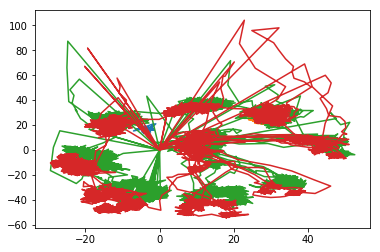

In [39]:
x=ast.literal_eval(meta['leftX_cue'].iloc[0])
y=ast.literal_eval(meta['leftY_cue'].iloc[0])
a=ast.literal_eval(meta['rightX_cue'].iloc[0])
b=ast.literal_eval(meta['rightY_cue'].iloc[0])
c=between_trigs[' LeftScreenX']
d=between_trigs[' LeftScreenY']
e=between_trigs[' RightScreenX']
f=between_trigs[' RightScreenY']
plt.plot(x,y)
plt.plot(a,b)
plt.plot(c,d)
plt.plot(e,f)
plt.show()

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


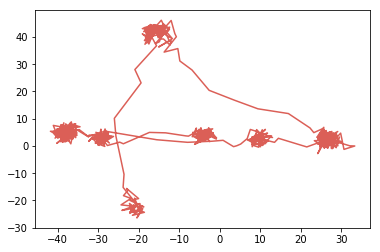

In [184]:
x=ast.literal_eval(meta['leftX_probe'].iloc[2])
y=ast.literal_eval(meta['leftY_probe'].iloc[2])
times=range(len(x))
a=ast.literal_eval(meta['rightX_probe'].iloc[2])
b=ast.literal_eval(meta['rightY_probe'].iloc[2])
c=between_trigs[' LeftScreenX']
d=between_trigs[' LeftScreenY']
#e=between_trigs[' RightScreenX']
#f=between_trigs[' RightScreenY']

sns.lineplot(x=x,y=y,sort=False,
             palette=sns.color_palette("hls",len(times)))

In [111]:
len(x)/25

33.0

In [150]:
[x*-1 for x in [1,2,3]]

[-1, -2, -3]

(-50, 60)

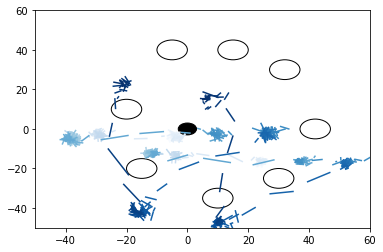

In [194]:
sns.set_palette('Blues',len(range(0,len(x)*2,2)))
fig,ax=plt.subplots()
for n in range(0,len(x),2):
    coordsX=x[n:n+2]
    coordsY=y[n:n+2]
    coordsX1=a[n:n+2]
    coordsY1=b[n:n+2]
    plt.plot(coordsX,[k*-1 for k in coordsY])
    plt.plot(coordsX1,[k*-1 for k in coordsY1])
    
fix=plt.Circle((0,0),3,color='black')
noon_clock=plt.Circle((15,40),5,color='black',fill=False)
two_clock=plt.Circle((32,30),5,color='black',fill=False)
three_clock=plt.Circle((42,0),5,color='black',fill=False)
four_clock=plt.Circle((30,-25),5,color='black',fill=False)
six_clock=plt.Circle((10,-35),5,color='black',fill=False)
eight_clock=plt.Circle((-15,-20),5,color='black',fill=False)
nine_clock=plt.Circle((-20,10),5,color='black',fill=False)
ten_clock=plt.Circle((-5,40),5,color='black',fill=False)
ax.add_artist(noon_clock)
ax.add_artist(two_clock)
ax.add_artist(three_clock)
ax.add_artist(four_clock)
ax.add_artist(six_clock)
ax.add_artist(eight_clock)
ax.add_artist(nine_clock)
ax.add_artist(ten_clock)
ax.add_artist(fix)


plt.xlim(-50,60)
plt.ylim(-50,60)

In [1]:
c=between_trigs[' LeftScreenX']
d=between_trigs[' LeftScreenY']
e=between_trigs[' RightScreenX']
f=between_trigs[' RightScreenY']
fig,ax=plt.subplots()
sns.set_palette('Blues',len(range(0,len(c),5)))
for n in range(0,len(c),5):
    coordsX=c[n:n+5]
    coordsY=d[n:n+5]
    coordsX1=e[n:n+5]
    coordsY1=f[n:n+5]
    plt.plot(coordsX,[k*-1 for k in coordsY])
    #plt.plot(coordsX1,[k*-1 for k in coordsY1])
    
fix=plt.Circle((0,0),3,color='black')
noon_clock=plt.Circle((15,40),5,color='black',fill=False)
two_clock=plt.Circle((32,30),5,color='black',fill=False)
three_clock=plt.Circle((42,0),5,color='black',fill=False)
four_clock=plt.Circle((30,-25),5,color='black',fill=False)
six_clock=plt.Circle((10,-35),5,color='black',fill=False)
eight_clock=plt.Circle((-15,-20),5,color='black',fill=False)
nine_clock=plt.Circle((-20,10),5,color='black',fill=False)
ten_clock=plt.Circle((-5,40),5,color='black',fill=False)
ax.add_artist(noon_clock)
ax.add_artist(two_clock)
ax.add_artist(three_clock)
ax.add_artist(four_clock)
ax.add_artist(six_clock)
ax.add_artist(eight_clock)
ax.add_artist(nine_clock)
ax.add_artist(ten_clock)
ax.add_artist(fix)
plt.xlim(-27,45)
plt.ylim(-50,60)

NameError: name 'between_trigs' is not defined